In [7]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium import IFrame
import base64
import matplotlib.pyplot as plt

In [8]:
#Section that creates the map
data4 = pd.DataFrame({
   'lat':[111,140, -110, -135, -37,122, 123, 124,126,-9, 78,5,123,-175,-67],
   'lon':[12,36, 22, 53, -14,24, 23, 22,33,55, 10,57,30,60,5],
   'name':['Vietnam', 'Japan', 'Mexico', 'Canada', 'Brazil','Taiwan', 
           'Taiwan','Taiwan','Korea','Scotland','India','Norway','China','Arctic','Venezuela'],
   'value':[2.2,0.14,0.15,0.144,0.25,1.82,0.78,0.114,0.125,0.24, 0.203,0.084,0.25,0.22,0.31]
})
data4
 
# Make an empty map
m4 = folium.Map(location=[20,0],
    tiles='https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}',
    attr='Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
    zoom_start=2)
  
# I can add marker one by one on the map
for i in range(0,len(data4)):
   folium.Circle(
      location=[data4.iloc[i]['lon'], data4.iloc[i]['lat']],
      popup=str(data4.iloc[i]['value'])+' ppm',
      radius=data4.iloc[i]['value']*300000.0,
      color='limegreen',
      fill=True,
      fill_color='limegreen'
   ).add_to(m4)


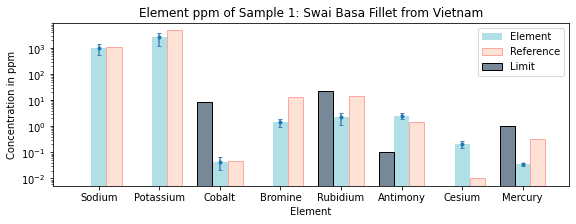

In [9]:
#Section that creates the first chart
#Swai Basa
station = '42'
resolution, width, height = 75, 9.5, 5

elements = ['Sodium', 'Potassium', 'Cobalt', 'Bromine', 'Rubidium', 'Antimony',
           'Cesium', 'Mercury']

ppm = [980.2, 2588.97, 0.043, 1.4, 2.22, 2.57, 0.21, 0.035]
sys_unc = [428.53, 1325.27, 0.022, 0.45, 1.056, 0.62, 0.061, 0.0043]
stat_unc = [5.66, 98.93, 0.0056, 0.07, 0.058, 0.17, 0.016, 0.0026]
x = np.linspace(1,len(ppm),len(ppm))
tot_unc = []
for i in x:
    val = (sys_unc[int(i)-1]**2+stat_unc[int(i)-1]**2)**0.5
    tot_unc.append(val)

mpl_fig = plt.figure(figsize=(9.25,3))
ax = mpl_fig.add_subplot(111)
w=0.25
p1 = ax.bar(x, ppm, w, color='powderblue', label='Element')

#reference values (based on averages)
ppm2 = [1120, 4912, 0.045, 13, 14.7, 1.5, 0.01, 0.314]

#regulatory limits for the elements
limits = [0, 0, 8.48, 0, 23, 0.1, 0, 1]

#reference graph
p2 = ax.bar(x+0.25, ppm2, w, color='lightsalmon', edgecolor='red', alpha=0.3, label='Reference')
#error bars
p3 = plt.errorbar(x, ppm, yerr=tot_unc, fmt='.', ecolor='steelblue', capthick=1, capsize=2)
#limits graph
p4 = ax.bar(x-0.25, limits, w, color='lightslategray', edgecolor='k', label='Limit')

plt.xlabel('Element')
plt.ylabel('Concentration in ppm')
plt.title('Element ppm of Sample 1: Swai Basa Fillet from Vietnam')
plt.legend()
plt.xticks(x, elements)
ax.set_yscale('log')

png = 'mpld3_{}.png'.format(station)
#mpl_fig.savefig(png, dpi=resolution)

#encoded = base64.b64encode(open(png, 'rb').read()).decode()

encoded = base64.b64encode(open('html/swaiBasa.jpeg', 'rb').read()).decode()


In [10]:
#The first pop up
html="""
    <body style="border:3px; border-style:solid; border-color:navy; padding: 1em;">
    <center><h3>Swai Basa </h3></center>
    <p style="float: left; padding: 1px 30px 1px 1px">
    <img src="data:image/jpeg;base64,{}" style="width:200px;height:100px;" alt="Vietnam Concentrations">
    </p>
    <p style="padding: 1px 1px 10px 1px">
    <ul>
        <li><b>Location:</b> Vietnam</li>
        <li><b>Average size:</b> 2 kg</li>
        <li><b>Concentration:</b> 2.22 ppm</li>
        <li><b>Limit:</b> 23 ppm</li>
    </ul>
    </p>
    <p>
        Rubidium is a non-toxic trace metal commonly found in marine life. While the concentration of rubidium
        in Vietnam appears high, it does not exceed the reference limit nor does it pose a health threat. The 
        amount of rubidium in the fish can be explained by it's diet since rubidium mimics potassium in the body. 
        Overall, it appears that rubidium is popular in fish located in South East Asia so there is probably an 
        increased amount of rubidium sediments. 
    </p>
    </body>
    """.format
iframe = IFrame(html(encoded), width=(width*resolution), height=(height*resolution))
iframe.addEventListener("load", function() {
  this.contentWindow.document.notesform.ID_client.value = html(encoded);
});

popup = folium.Popup(iframe, max_width=2650)

folium.Marker([12,110], popup=popup).add_to(m4)

m4.save('html/RubidiumMap.html')

SyntaxError: invalid syntax (<ipython-input-10-362c32ec7e84>, line 26)

In [ ]:
m4